In [1]:
# Import key packages for data processing and NLP

import pandas as pd
import io

# Import the necessary libraries for text preprocessing
import contractions  # Allows us to handle text contractions (e.g., "can't" -> "cannot")
import re  # Used for finding and replacing text patterns (e.g., removing special characters)
from datetime import datetime  # Provides functions for handling date and time operations

# Import NLTK (Natural Language Toolkit) for text tokenization
import nltk
from nltk.tokenize import word_tokenize  # Tokenizes text into individual words
nltk.download('punkt')  # Downloads the tokenizer model which we'll be using
nltk.download('punkt_tab')

# Import the 'stopwords' corpus from NLTK (Natural Language Toolkit)
from nltk.corpus import stopwords
nltk.download('stopwords')  # Downloads the predefined list of common stopwords from NLTK.

# WordCloud for visualizing the frequency of words in text data
from wordcloud import WordCloud
import matplotlib.pyplot as plt  # Library for plotting and visualization

# Libraries for lemmatization (reducing words to their base form)
from nltk.stem import WordNetLemmatizer  # Performs lemmatization
from nltk.corpus import wordnet  # Provides a lexical database for lemmatization
nltk.download('averaged_perceptron_tagger')  # Downloads the model for part-of-speech tagging
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')  # Downloads the WordNet lexical database

# Libraries for word embeddings (vector representations of words)
!pip install numpy --upgrade --force-reinstall
!pip install gensim --upgrade --force-reinstall
import gensim.downloader as api  # Getting our pre-trained word embedding models
import numpy as np  # Numerical computing library for handling arrays and matrices

# package to handle warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/chantellelin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/chantellelin/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chantellelin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/chantellelin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/chantellelin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chantellelin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/2b/3e/e7247c1d4f15086bb106c8d43c925b0b2ea20270224f5186fa48d4fb5cbd/numpy-2.2.4-cp311-cp311-macosx_14_0_arm64.whl.metadata
  Using cached numpy-2.2.4-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-macosx_14_0_arm64.whl (5.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 2.2.4 which is incompatible.
tensorflow-macos 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 2.2.4 which is incompatible.


In [3]:
df = pd.read_csv("/Users/chantellelin/Desktop/PhD- Year 1/HAD7001/group_project/Group4-NLP_dataset - Sheet1.csv")
# Select specific columns from the DataFrame
df = df[['id', 'first_author', 'year', 'abstract','intro','discussion']]

# Display the first few rows (head) of the DataFrame to inspect the data
df.head()

,id,first_author,year,abstract,intro,discussion
0,10.1007/s11042-023-17926-x,zhao,2024,To construct effective prediction models for h...,Diabetes and hypertension are the two most com...,"In this study, hypertension risk prediction mo..."
1,10.3390/diagnostics12081967,jeong,2022,Hypertension and diabetes mellitus are major c...,High blood pressure and diabetes are major mod...,Previous studies on the impact of participatio...
2,10.3389/fcvm.2022.839379,islam,2022,Background: Hypertension is the most common mo...,Hypertension is the leading cause of cardiovas...,"To our knowledge, this is the first study to a..."
3,10.1371/journal.pone.0289613,islam,2023,"Background and objectives: Hypertension (HTN),...","Hypertension (HTN), defined as the elevated bl...","In this study, we investigate several ML-based..."
4,10.1155/2020/9108216,cai,2020,Background: Hypertension is now common in Chin...,Type 2 diabetes (T2D) is a form of hyperglycem...,With the development of the economy and the im...


In [4]:
# Define a cleaning function that will replace the incorrectly encoded characters.
def clean_encoding(text):
    # Replace the incorrect character sequences with the correct character.
    # You can chain multiple replace calls to handle different cases.
    text = text.replace('¡¯', "'")  # Replace the sequence that represents a single quote
    text = text.replace('¡¯', "'")  # Replace incorrectly encoded single quote
    text = text.replace('’', "'").replace('“', '"').replace('”', '"')  # Fix curly quotes
    text = text.replace('–', '-').replace('—', '-')  # Normalize dashes
    text = text.replace('±', '+/-').replace('β', 'beta').replace('γ', 'gamma')  # Replace symbols
    text = text.replace('\u2009', ' ').replace('\u200b', '')  # Remove special spaces
    return text

# Apply the cleaning function to the 'discussiony' column of the DataFrame.
df['discussion'] = df['discussion'].apply(clean_encoding)
df.head()

,id,first_author,year,abstract,intro,discussion
0,10.1007/s11042-023-17926-x,zhao,2024,To construct effective prediction models for h...,Diabetes and hypertension are the two most com...,"In this study, hypertension risk prediction mo..."
1,10.3390/diagnostics12081967,jeong,2022,Hypertension and diabetes mellitus are major c...,High blood pressure and diabetes are major mod...,Previous studies on the impact of participatio...
2,10.3389/fcvm.2022.839379,islam,2022,Background: Hypertension is the most common mo...,Hypertension is the leading cause of cardiovas...,"To our knowledge, this is the first study to a..."
3,10.1371/journal.pone.0289613,islam,2023,"Background and objectives: Hypertension (HTN),...","Hypertension (HTN), defined as the elevated bl...","In this study, we investigate several ML-based..."
4,10.1155/2020/9108216,cai,2020,Background: Hypertension is now common in Chin...,Type 2 diabetes (T2D) is a form of hyperglycem...,With the development of the economy and the im...


In [5]:
# Expand contractions in the 'discussion' column
df['discussion_expanded'] = df['discussion'].apply(lambda x: contractions.fix(x))
df.head()

,id,first_author,year,abstract,intro,discussion,discussion_expanded
0,10.1007/s11042-023-17926-x,zhao,2024,To construct effective prediction models for h...,Diabetes and hypertension are the two most com...,"In this study, hypertension risk prediction mo...","In this study, hypertension risk prediction mo..."
1,10.3390/diagnostics12081967,jeong,2022,Hypertension and diabetes mellitus are major c...,High blood pressure and diabetes are major mod...,Previous studies on the impact of participatio...,Previous studies on the impact of participatio...
2,10.3389/fcvm.2022.839379,islam,2022,Background: Hypertension is the most common mo...,Hypertension is the leading cause of cardiovas...,"To our knowledge, this is the first study to a...","To our knowledge, this is the first study to a..."
3,10.1371/journal.pone.0289613,islam,2023,"Background and objectives: Hypertension (HTN),...","Hypertension (HTN), defined as the elevated bl...","In this study, we investigate several ML-based...","In this study, we investigate several ML-based..."
4,10.1155/2020/9108216,cai,2020,Background: Hypertension is now common in Chin...,Type 2 diabetes (T2D) is a form of hyperglycem...,With the development of the economy and the im...,With the development of the economy and the im...


In [6]:
# Let's perform some basic data cleaning tasks such as:
# - Converting the date column to datetime
# - Lowercasing the tweet texts
# - Removing special characters and numbers
# - Correcting the spelling of "Neutral" in Emotion column

# Function to remove special characters and numbers
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z\s]', '', text)

# Perform the data cleaning
#df['date'] = pd.to_datetime(df['year'])
df['discussion'] = df['discussion_expanded'].str.lower()
df['discussion'] = df['discussion'].apply(remove_special_characters)
#df['Emotion'] = df['Emotion'].replace('Netural', 'Neutral') # Correcting the spelling
#df['Emotion'] = df['Emotion'].str.capitalize()

df.head()

,id,first_author,year,abstract,intro,discussion,discussion_expanded
0,10.1007/s11042-023-17926-x,zhao,2024,To construct effective prediction models for h...,Diabetes and hypertension are the two most com...,in this study hypertension risk prediction mod...,"In this study, hypertension risk prediction mo..."
1,10.3390/diagnostics12081967,jeong,2022,Hypertension and diabetes mellitus are major c...,High blood pressure and diabetes are major mod...,previous studies on the impact of participatio...,Previous studies on the impact of participatio...
2,10.3389/fcvm.2022.839379,islam,2022,Background: Hypertension is the most common mo...,Hypertension is the leading cause of cardiovas...,to our knowledge this is the first study to ap...,"To our knowledge, this is the first study to a..."
3,10.1371/journal.pone.0289613,islam,2023,"Background and objectives: Hypertension (HTN),...","Hypertension (HTN), defined as the elevated bl...",in this study we investigate several mlbased a...,"In this study, we investigate several ML-based..."
4,10.1155/2020/9108216,cai,2020,Background: Hypertension is now common in Chin...,Type 2 diabetes (T2D) is a form of hyperglycem...,with the development of the economy and the im...,With the development of the economy and the im...


In [8]:
def tokenize_text(text):
   return word_tokenize(text)
df['tokens'] = df['discussion'].apply(tokenize_text)
df.head()

,id,first_author,year,abstract,intro,discussion,discussion_expanded,tokens
0,10.1007/s11042-023-17926-x,zhao,2024,To construct effective prediction models for h...,Diabetes and hypertension are the two most com...,in this study hypertension risk prediction mod...,"In this study, hypertension risk prediction mo...","[in, this, study, hypertension, risk, predicti..."
1,10.3390/diagnostics12081967,jeong,2022,Hypertension and diabetes mellitus are major c...,High blood pressure and diabetes are major mod...,previous studies on the impact of participatio...,Previous studies on the impact of participatio...,"[previous, studies, on, the, impact, of, parti..."
2,10.3389/fcvm.2022.839379,islam,2022,Background: Hypertension is the most common mo...,Hypertension is the leading cause of cardiovas...,to our knowledge this is the first study to ap...,"To our knowledge, this is the first study to a...","[to, our, knowledge, this, is, the, first, stu..."
3,10.1371/journal.pone.0289613,islam,2023,"Background and objectives: Hypertension (HTN),...","Hypertension (HTN), defined as the elevated bl...",in this study we investigate several mlbased a...,"In this study, we investigate several ML-based...","[in, this, study, we, investigate, several, ml..."
4,10.1155/2020/9108216,cai,2020,Background: Hypertension is now common in Chin...,Type 2 diabetes (T2D) is a form of hyperglycem...,with the development of the economy and the im...,With the development of the economy and the im...,"[with, the, development, of, the, economy, and..."


In [9]:
# Define a function that removes stop words from a list of tokens.
# Stop words are common words that are usually filtered out in NLP tasks.
def remove_stop_words(tokens):
    # Create a set of English stop words. Sets are faster for membership tests than lists.
    stop_words_set = set(stopwords.words('english'))

    # Return a new list that contains only the tokens that are not stop words.
    # The token is also converted to lowercase to ensure case-insensitive matching.
    return [token for token in tokens if token.lower() not in stop_words_set]

# Apply the 'remove_stop_words' function to the 'tokens' column of the dataframe 'df'.
# The result is a new column 'tokens_no_stop' in the dataframe 'df'.
df['tokens_no_stop'] = df['tokens'].apply(remove_stop_words)

# Display the first few rows of the DataFrame showing the 'tweet', 'tokens', and 'tokens_no_stop' columns.
# This gives a visual comparison between the original tokens and the tokens after stop words removal.
df[['discussion', 'tokens', 'tokens_no_stop']].head()

,discussion,tokens,tokens_no_stop
0,in this study hypertension risk prediction mod...,"[in, this, study, hypertension, risk, predicti...","[study, hypertension, risk, prediction, models..."
1,previous studies on the impact of participatio...,"[previous, studies, on, the, impact, of, parti...","[previous, studies, impact, participation, hea..."
2,to our knowledge this is the first study to ap...,"[to, our, knowledge, this, is, the, first, stu...","[knowledge, first, study, apply, ml, approache..."
3,in this study we investigate several mlbased a...,"[in, this, study, we, investigate, several, ml...","[study, investigate, several, mlbased, algorit..."
4,with the development of the economy and the im...,"[with, the, development, of, the, economy, and...","[development, economy, improvement, peoples, l..."


In [92]:
# Define additional context-sensitive stop words
context_sensitive_stop_words = set(['study','studies','research', 'results', 'findings', 'methodology', 'data', 'analysis', 'observed', 'significant', 'conclusion',
                                    'hypothesis','model','limitation','based','variable','variables','although','may','previous','among','dataset','factor','found',
                                    'population', "et al", "td", 'used', 'using', 'without', "including", 'include', 'proposed', 'use', 'related', 'included', 'et al.',
                                    'presented','first', 'type', 'present', 'three', 'provide', 'one', 'two','three', 'provide' 'obtained', 'obtain', 'between', 'certain', 'furthermore',
                                    'well', 'tp', 'number', 'according', 'et',  'al', 'another', 'demonstrated', 'demonstrate', 'et al', 'apply', 'investigate', 'people', 'peoples',
                                    'several', 'propose', 'living', 'potential', 'sgb', 'dch', 'existing' 'whether', 'kaggle', 'approach', 'approaches', 'main', 'given',
                                    'existing', 'involves', 'investigating', 'current', 'vast', 'applied', 'despite', 'amount', 'tdm', 'new', 'could', 'future', 'value'
                                    'various', 'whether', 'recorded', 'developed', 'increase', 'increasing', 'determine', 'purpose', 'includes', 'mainly', 'containing',
                                    'identified', 'obtaining', 'af', 'shown', 'various', 'af', 'china', 'available', 'due', 'showed', 'reported', 'compared', 'increased',
                                    'similar', 'within', 'conducted', 'reason', 'information', 'developping', 'settling', 'chinese', 'allbeacuse mortality', 'allbecause', 
                                    'participants', 'pwv', 'performed'
                                    ])

# English stop words
stop_words_set = set(stopwords.words('english')) # At the beginning of the tutorial, we downloaded a predefined set of common stopwords from NLTK /
# in this line, we're getting this predefined set of english stop words.

# Here we will remove both general and context-sensitive stop words
def remove_context_sensitive_stop_words(tokens):
    # Combine the general English stop words with the context-specific stop words /
    # to create a comprehensive set of words to filter out.
    all_stop_words = stop_words_set | context_sensitive_stop_words
    return [token for token in tokens if token.lower() not in all_stop_words]

# Apply the updated function to remove both general and context-sensitive stop words
df['tokens_no_stop_context'] = df['tokens'].apply(remove_context_sensitive_stop_words)

# Display the DataFrame
df[['discussion', 'tokens', 'tokens_no_stop_context']].head()

,discussion,tokens,tokens_no_stop_context
0,in this study hypertension risk prediction mod...,"[in, this, study, hypertension, risk, predicti...","[hypertension, risk, prediction, models, diabe..."
1,previous studies on the impact of participatio...,"[previous, studies, on, the, impact, of, parti...","[impact, participation, health, screening, pro..."
2,to our knowledge this is the first study to ap...,"[to, our, knowledge, this, is, the, first, stu...","[knowledge, ml, predict, hypertension, associa..."
3,in this study we investigate several mlbased a...,"[in, this, study, we, investigate, several, ml...","[mlbased, algorithms, explainable, framework, ..."
4,with the development of the economy and the im...,"[with, the, development, of, the, economy, and...","[development, economy, improvement, standards,..."


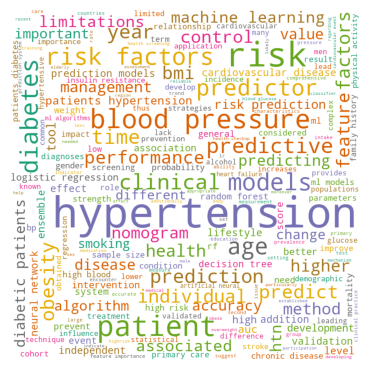

In [93]:
# Combine all tokens from the 'tokens_no_stop_context' column into a single list
# You can remove .head(5000) if you want to generate the word cloud for the entire dataset
all_tokens = sum(df['tokens_no_stop_context'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='Dark2',  
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()